In [3]:
# Designed for MLH Data Day Grind Hackathon
# Webcred.tech
# Use NLP to detect fake job listings

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [4]:
import csv
import os

labels = []
textFeatures = []

with open('/content/fake_job_postings.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    feature = []
    # job title, department name, company name, description, requirements
    textFeatures.append(str(row[1]) + " " + str(row[3]) + " " + str(row[5]) + " " + str(row[6]) + " " + str(row[7]))

    # define for categorical crossentropy
    itemLabel = [0,0]
    itemLabel[int(row[-1])] = 1
    labels.append(itemLabel)




In [5]:
# split data into training and validation sets
splitProp = .7
splitIndex = round(len(textFeatures) * splitProp)

allText = textFeatures
allLabels = labels

trainingText = allText[:splitIndex]
validationText = allText[splitIndex:]
trainingLabels = allLabels[:splitIndex]
validationLabels = allLabels[splitIndex:]

In [6]:
vocab_size = 1000
embedding_dim = 24
max_length = 100
trunc_type='post'
oov_tok='<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenize and pad data
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(trainingText)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(trainingText)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(validationText)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [7]:
#padded token matrix
print(testing_padded[20])

#original text
print(validationText[20])

[  1   1   1   1   1 314 439 355 395 314 440  54   3  71  13   1   4   1
 685   3 535   4 947 145   9  29  72  12  75  71 225  29 314   1   2   1
  29 588 100  26   1   1   7   1   1   1  11  51   9   6 321   2 376   1
   1  37 285  87  17 112   3   1   1   2   1 378   1 148 103  87  17 683
   3 583   1   7   1   1   2   1  12 300 147   1   1   2 312  11 697  26
  87  17 112   3   1   1  42   1   1 378]
TV Satellite Dish Installer  Hawkeye Recruitment provides cost effective recruitment advertising solutions to help you cast the widest net to find the perfect candidate for your job. We can help improve your recruitment efforts, and streamline your hiring process.  Holaday Satellite in Mount Pleasant Iowa is looking for a motivated and experienced Satellite Installer. This individual must be able to install Dish and Directv without supervision. They also must be willing to become certified in installing DishNet and Exede. We offer excellent wages. Van and equipment is provided.  Must be

In [8]:
# Network Structure
# Embedding Layer maps tokenized words to nth dimensional vector (allows words to be respresented as a position in space)
# 2 Bidirectional LSTM layers (allows words to be a factor using cell states)
# 3 Dense Layers Simple DNN and Output


#create model structure
layers = [tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dropout(.2),
          tf.keras.layers.Dense(2, activation='softmax')]

# create model and compile
model = tf.keras.models.Sequential(layers)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 24)           24000     
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 64)           14592     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 171,714
Trainable params: 171,714
Non-trainable params: 0
__________________________________________________

In [9]:
history = model.fit(padded, np.array(trainingLabels), epochs=10, validation_data=(testing_padded, np.array(validationLabels)))

Epoch 1/10
392/392 [==============================] - 43s 109ms/step - loss: 0.1334 - accuracy: 0.9672 - val_loss: 0.1543 - val_accuracy: 0.9551
Epoch 2/10
392/392 [==============================] - 41s 105ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.1490 - val_accuracy: 0.9603
Epoch 3/10
392/392 [==============================] - 41s 104ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.1359 - val_accuracy: 0.9636
Epoch 4/10
392/392 [==============================] - 41s 104ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.1407 - val_accuracy: 0.9629
Epoch 5/10
392/392 [==============================] - 41s 104ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.2170 - val_accuracy: 0.9618
Epoch 6/10
392/392 [==============================] - 41s 104ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.2067 - val_accuracy: 0.9627
Epoch 7/10
392/392 [==============================] - 41s 104ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.2144 - val_ac

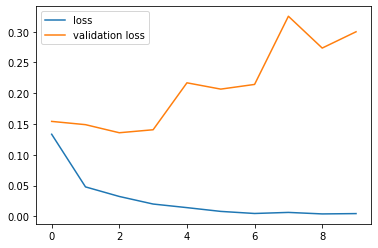

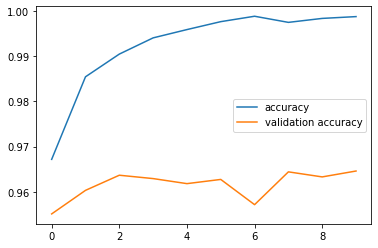

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

plt.figure(1)
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.figure(2)
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.show()


In [11]:
sequence = tokenizer.texts_to_sequences(["This job requires you to work for free."])
paddedSeq = pad_sequences(sequence, maxlen=max_length, truncating=trunc_type)

out = model.predict(paddedSeq)[0]
prob = 0
if out[0] >= .5:
  print("Not a Scam")
  prob = out[0]
else:
  print("Scam")
  prob = out[1]

print("with {prob}% confidence".format(prob = prob*100))


Scam
with 92.8543746471405% confidence


In [12]:
#Pull weights from embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

import io

inv_tokenizer = {v: k for k, v in word_index.items()}

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = inv_tokenizer.get(word_num)
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()
print(file_len('vecs.tsv'), file_len('meta.tsv'))

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(1000, 24)
999 999


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pickle as pkl

# export model and tokenizer
model.save('/content/jobModel.h5')
pkl.dump(tokenizer, open('/content/jobTokenizer.pkl', 'wb'))